In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Health Insurance Lead Prediction Raw Data.csv", index_col=0)
df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,,,,,,,,,,,,,
1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [3]:
df.describe()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [4]:
def list_columns(dataframe):
    cols = dataframe.columns
    for i in range(len(cols)):
        print(f'{i+1}. {cols[i]}')

In [5]:
list_columns(df)

1. City_Code
2. Region_Code
3. Accomodation_Type
4. Reco_Insurance_Type
5. Upper_Age
6. Lower_Age
7. Is_Spouse
8. Health Indicator
9. Holding_Policy_Duration
10. Holding_Policy_Type
11. Reco_Policy_Cat
12. Reco_Policy_Premium
13. Response


Data Visualization

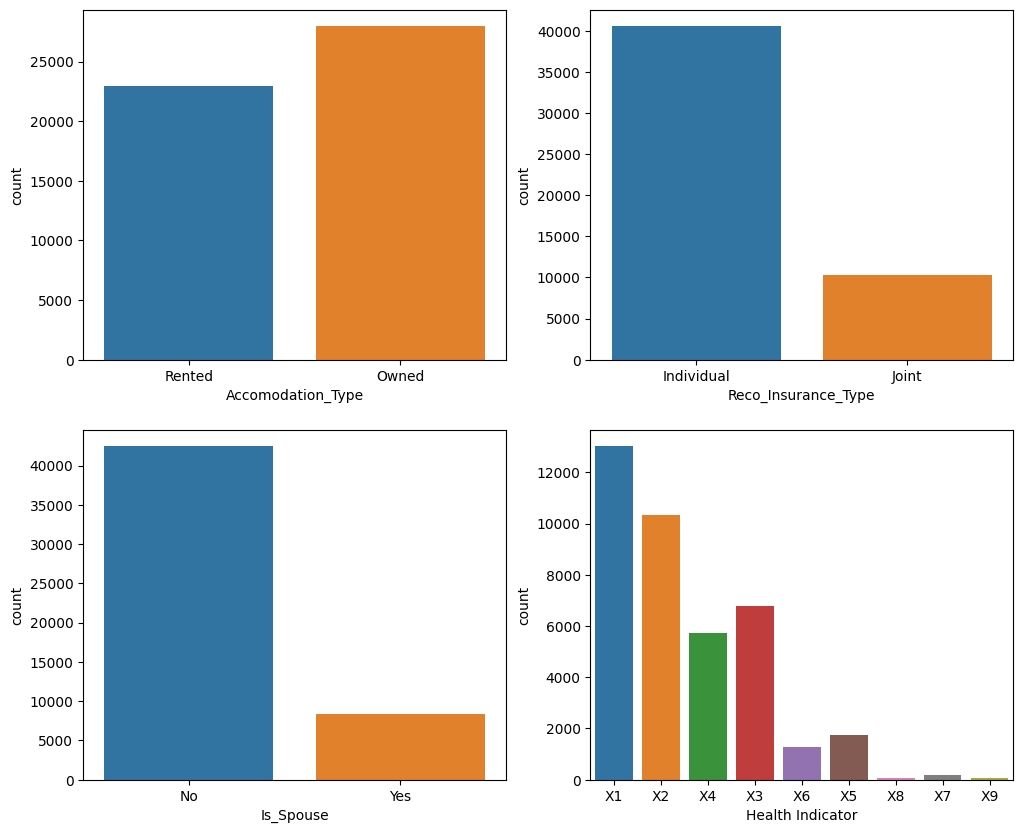

In [6]:
cols = ['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator']
fig, ax = plt.subplots(2,2, figsize=(12,10))

sns.countplot(data=df, x=cols[0], ax = ax[0][0])
sns.countplot(data=df, x=cols[1], ax = ax[0][1])
sns.countplot(data=df, x=cols[2], ax = ax[1][0])
sns.countplot(data=df, x=cols[3], ax = ax[1][1])
plt.show()

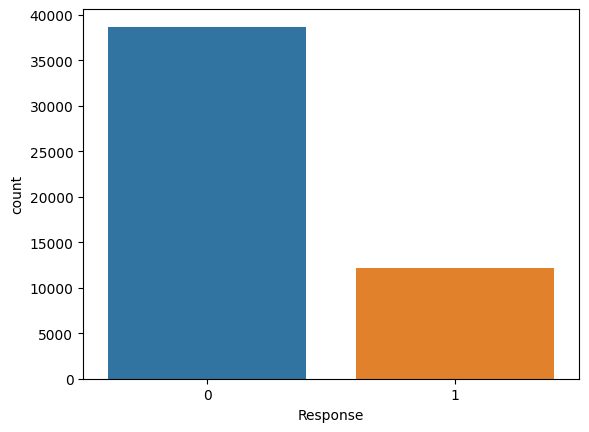

In [7]:
sns.countplot(x=df.Response)
plt.show()

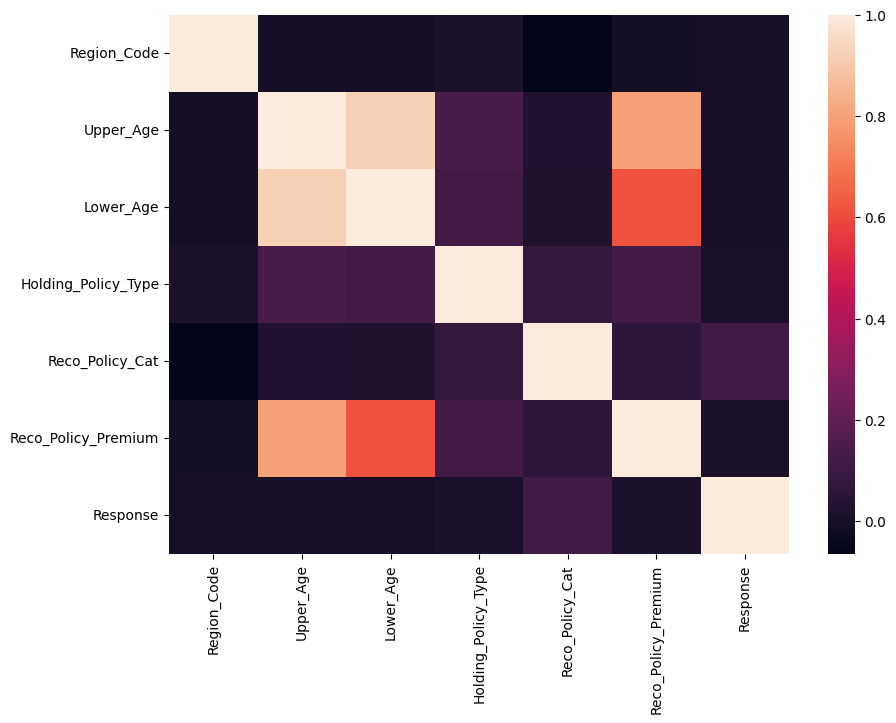

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr())
plt.show()

In [9]:
df.corr()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Region_Code,1.000000,-0.005649,-0.005928,0.011599,-0.065120,-0.010797,0.001121
Upper_Age,-0.005649,1.000000,0.921392,0.141890,0.025257,0.792689,0.002772
Lower_Age,-0.005928,0.921392,1.000000,0.118028,0.021163,0.615739,-0.002099
Holding_Policy_Type,0.011599,0.141890,0.118028,1.000000,0.079678,0.121342,0.009297
Reco_Policy_Cat,-0.065120,0.025257,0.021163,0.079678,1.000000,0.060989,0.114321
Reco_Policy_Premium,-0.010797,0.792689,0.615739,0.121342,0.060989,1.000000,0.007943
Response,0.001121,0.002772,-0.002099,0.009297,0.114321,0.007943,1.000000


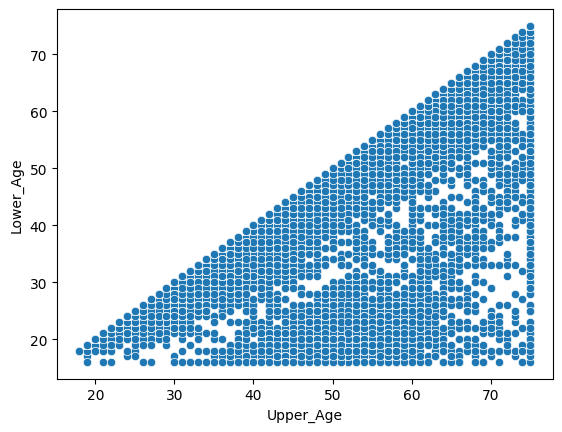

In [10]:
sns.scatterplot(df, x= 'Upper_Age', y='Lower_Age')
plt.show()

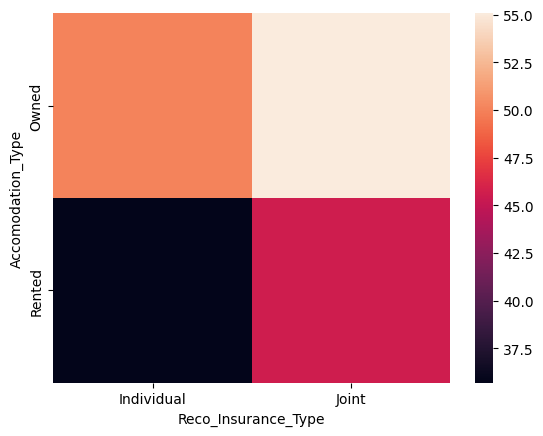

In [11]:
d1 = df.pivot_table(index='Accomodation_Type',columns= 'Reco_Insurance_Type', values='Upper_Age', aggfunc='mean')
sns.heatmap(data=d1)
plt.show()

In [12]:
sample_data = df.sample(1000)

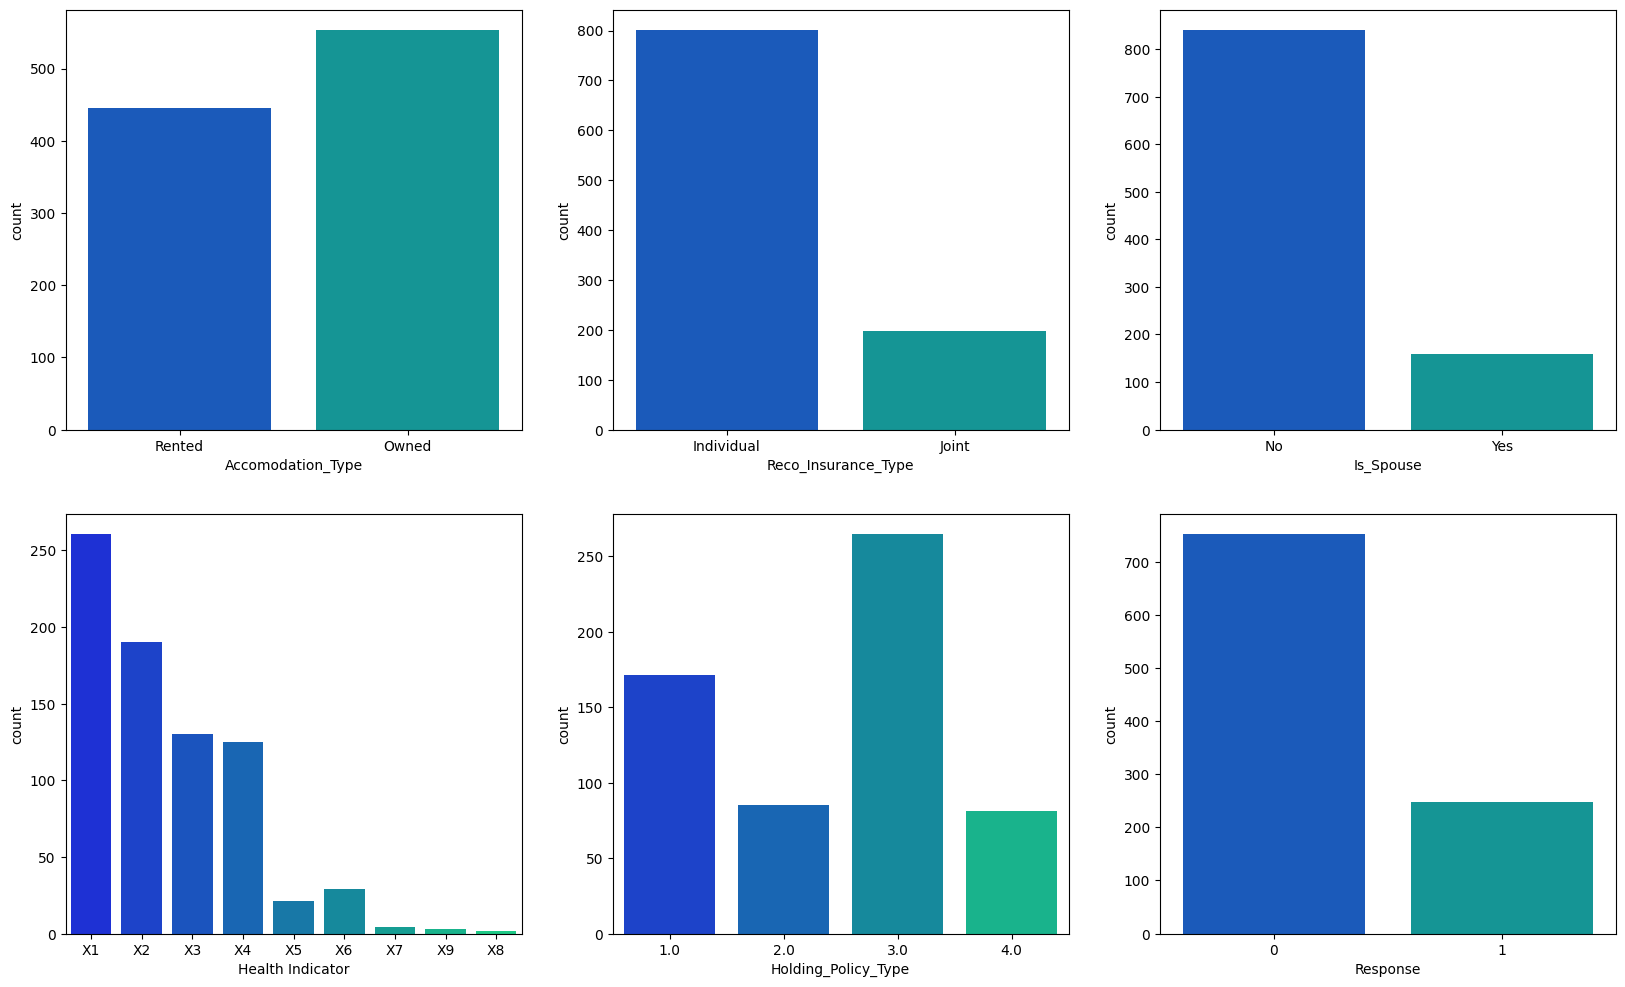

In [13]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))
sns.countplot(x = 'Accomodation_Type', data = sample_data, palette= 'winter', ax = axes[0, 0]);
sns.countplot(x = 'Reco_Insurance_Type', data = sample_data, palette= 'winter', ax = axes[0, 1]);
sns.countplot(x = 'Is_Spouse', data = sample_data, palette= 'winter', ax = axes[0, 2]);
sns.countplot(x = 'Health Indicator', data = sample_data, palette= 'winter', ax = axes[1, 0]);
sns.countplot(x = 'Holding_Policy_Type', data = sample_data, palette= 'winter', ax = axes[1, 1]);
sns.countplot(x = 'Response', data = sample_data, palette= 'winter', ax = axes[1, 2]);

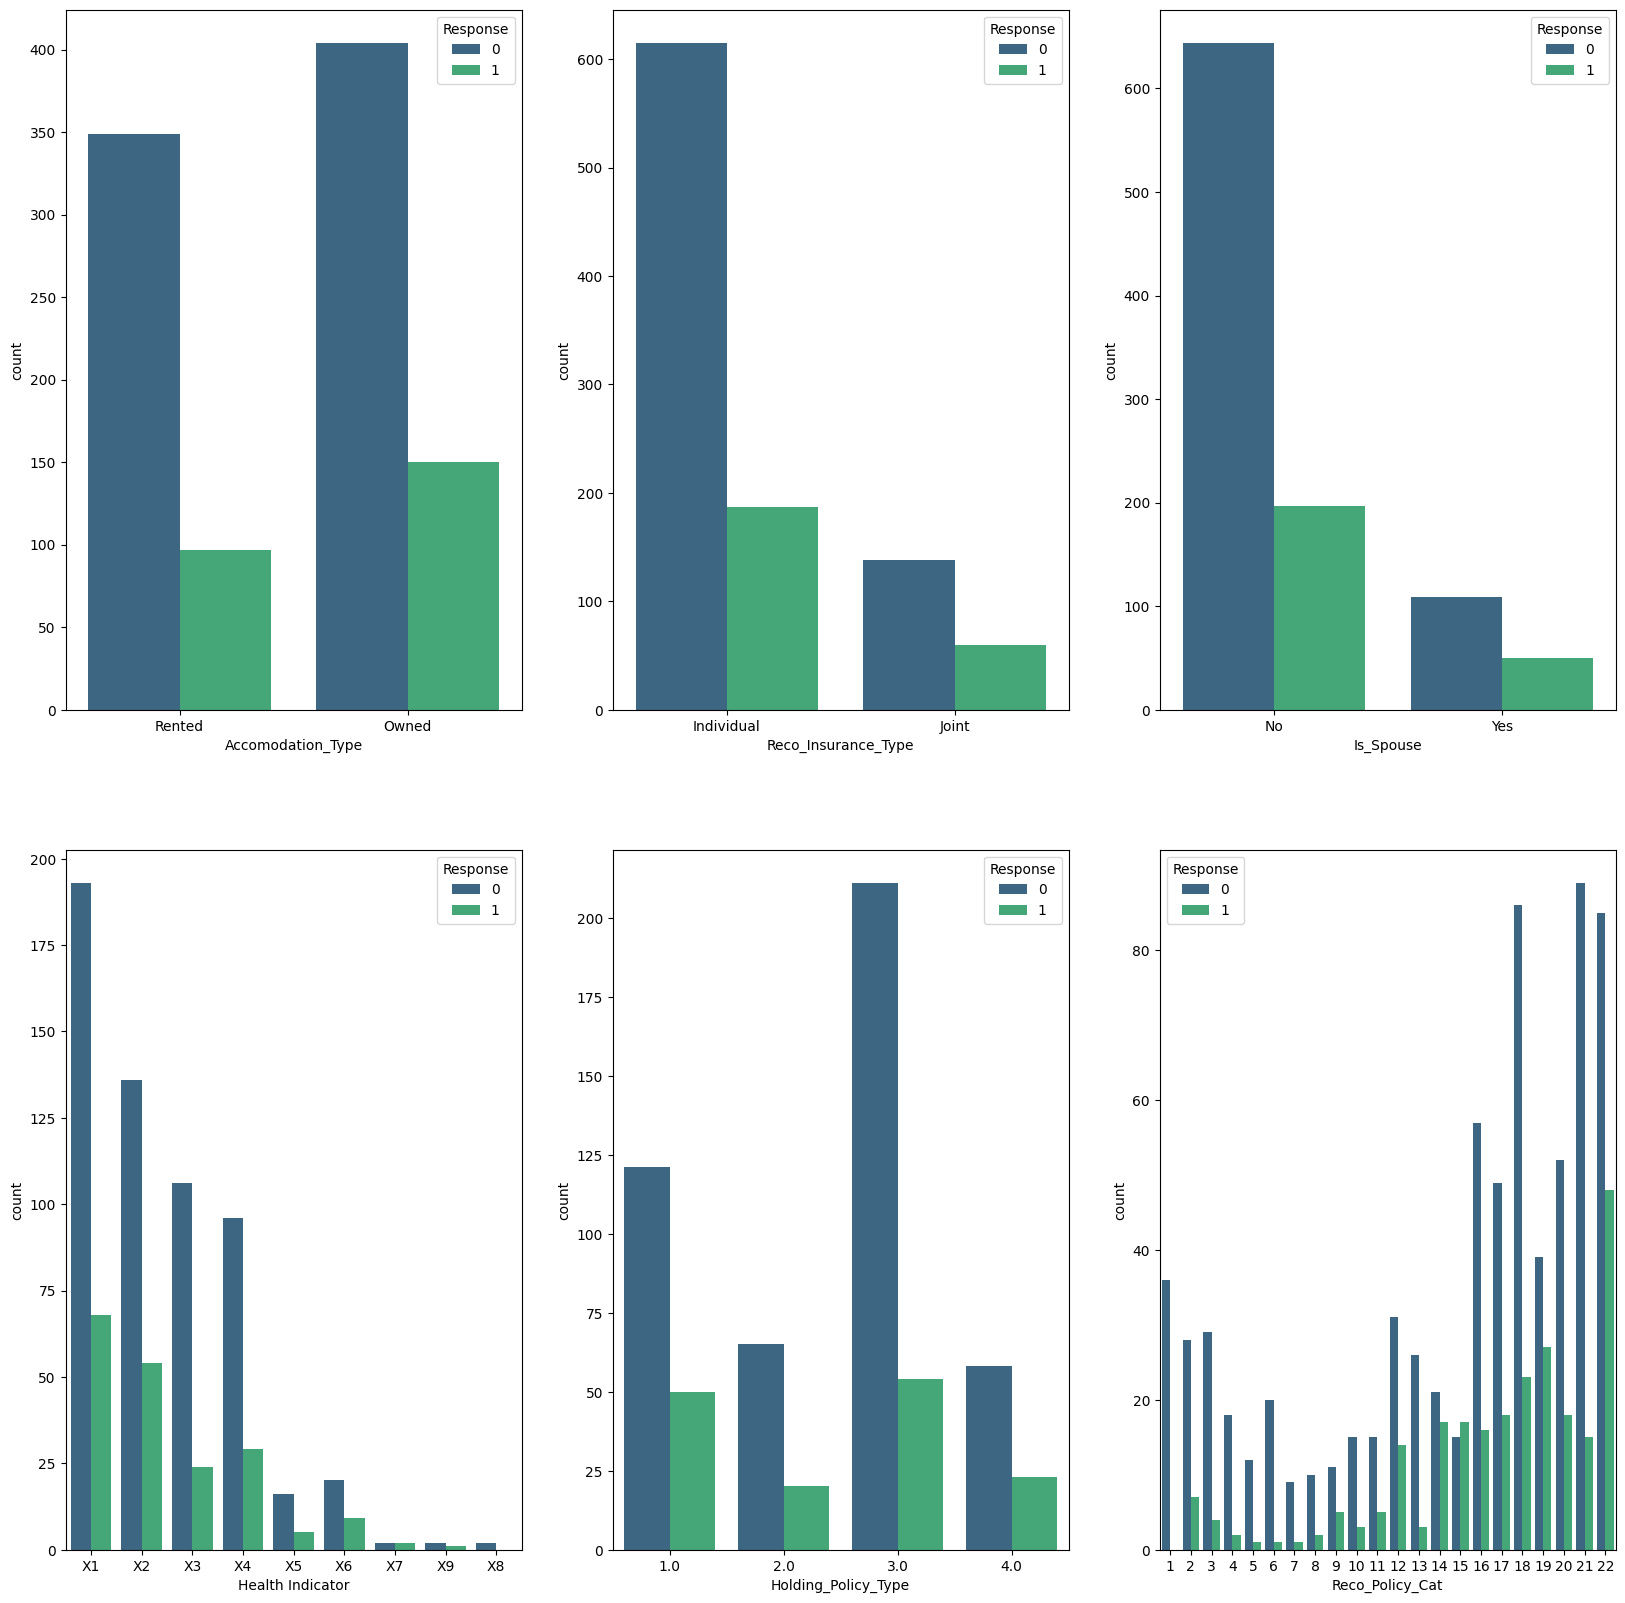

In [14]:
fig, axes = plt.subplots(2, 3, figsize = (20, 20))
sns.countplot(x = 'Accomodation_Type', data = sample_data, hue= 'Response', palette= 'viridis', ax = axes[0, 0]);
sns.countplot(x = 'Reco_Insurance_Type', data = sample_data, hue= 'Response',  palette= 'viridis', ax = axes[0, 1]);
sns.countplot(x = 'Is_Spouse', data = sample_data, hue= 'Response',  palette= 'viridis', ax = axes[0, 2]);
sns.countplot(x = 'Health Indicator', data = sample_data, hue= 'Response',  palette= 'viridis', ax = axes[1, 0]);
sns.countplot(x = 'Holding_Policy_Type', data = sample_data, hue= 'Response',  palette= 'viridis', ax = axes[1, 1]);
sns.countplot(x = 'Reco_Policy_Cat', data = sample_data, hue= 'Response',  palette= 'viridis', ax = axes[1, 2]);

In [15]:
df.isnull().sum().count

<bound method Series.count of City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50882 entries, 1 to 50882
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  object 
 3   Reco_Insurance_Type      50882 non-null  object 
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         39191 non-null  object 
 8   Holding_Policy_Duration  30631 non-null  object 
 9   Holding_Policy_Type      30631 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 5.4+ MB


In [17]:
df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,,,,,,,,,,,,,
1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


#### Data Preprocesssing

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50882 entries, 1 to 50882
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  object 
 3   Reco_Insurance_Type      50882 non-null  object 
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         39191 non-null  object 
 8   Holding_Policy_Duration  30631 non-null  object 
 9   Holding_Policy_Type      30631 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 5.4+ MB


In [19]:
df.describe()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [20]:
df.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [21]:
df['Holding_Policy_Type'].mode()

0    3.0
Name: Holding_Policy_Type, dtype: float64

In [22]:
df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mode()[0], inplace=True)

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [25]:
df = pd.get_dummies(df, columns=['Accomodation_Type','City_Code','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Duration'])
df.head()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Owned,Accomodation_Type_Rented,City_Code_C1,...,Holding_Policy_Duration_14+,Holding_Policy_Duration_14.0,Holding_Policy_Duration_2.0,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0
ID,,,,,,,,,,,,,,,,,,,,,
1,3213,36,36,3.0,22,11628.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,4378,52,48,3.0,19,17780.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2190,44,44,1.0,16,10404.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6,1785,52,52,1.0,22,15264.0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8,3175,75,73,4.0,17,29344.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [26]:
df['Reco_Policy_Premium'] = ((df['Reco_Policy_Premium'] - df['Reco_Policy_Premium'].mean())/df['Reco_Policy_Premium'].std())

#### Model Training

In [27]:
X = df.drop(['Response'], axis=1)
X.head()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_Type_Owned,Accomodation_Type_Rented,City_Code_C1,City_Code_C10,...,Holding_Policy_Duration_14+,Holding_Policy_Duration_14.0,Holding_Policy_Duration_2.0,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0
ID,,,,,,,,,,,,,,,,,,,,,
1,3213,36,36,3.0,22,-0.589278,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4378,52,48,3.0,19,0.369526,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2190,44,44,1.0,16,-0.780041,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1785,52,52,1.0,22,-0.022599,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8,3175,75,73,4.0,17,2.171803,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
y = df['Response']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

##### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression(max_iter=1000, random_state=3)

In [33]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=3)

In [34]:
y_pred = model.predict(X_test)

In [35]:
logistic_score = model.score(X_test,y_test)
logistic_score

0.75614464032943

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [37]:
confusion_matrix = confusion_matrix(y_test, y_pred)

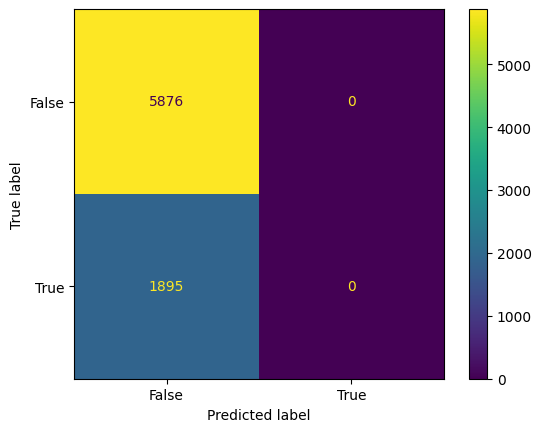

In [38]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

##### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
model = DecisionTreeClassifier(criterion='entropy', random_state=3)

In [41]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=3)

In [42]:
y_pred = model.predict(X_test)

In [43]:
decision_score = model.score(X_test,y_test)
decision_score

0.667739029725904

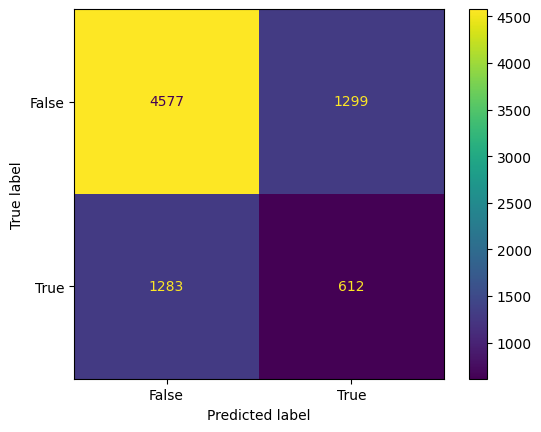

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

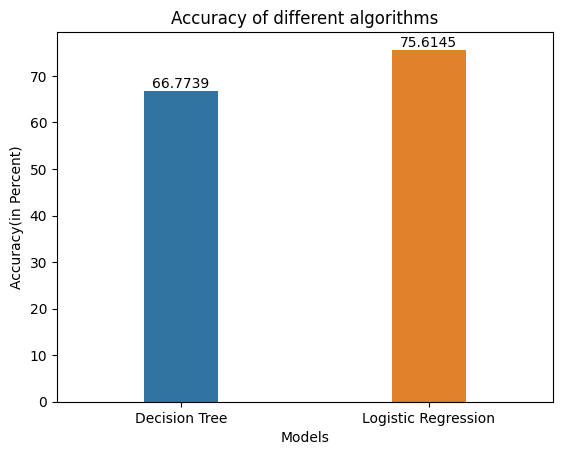

In [58]:
ax = sns.barplot(x=['Decision Tree','Logistic Regression'], y=[decision_score*100, logistic_score*100], width=.3)
plt.xlabel('Models')
plt.ylabel('Accuracy(in Percent)')
plt.title('Accuracy of different algorithms')
for i in ax.containers:
    ax.bar_label(i)
plt.show()